In [12]:
# Let's import the yeast model
# Let's import the yeast model
import cobra
model = cobra.io.read_sbml_model("iWFL_1372.xml")

solution=model.optimize()
model.summary()

# And check the solution using default parameters
# Fix the ethanol reaction flux and see how it affects the solution
# Fix a range for the ethanol reaction flux around +/-10% of the observed value
value=2.63
model.reactions.get_by_id("EX_etoh_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_etoh_e").lower_bound=value-0.1*value

value=0.71
model.reactions.get_by_id("EX_lac__L_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_lac__L_e").lower_bound=value-0.1*value

value=7.20
model.reactions.get_by_id("EX_for_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_for_e").lower_bound=value-0.1*value

value=-7.70
model.reactions.get_by_id("EX_ac_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_ac_e").lower_bound=value-0.1*value

value=-10.64
model.reactions.get_by_id("EX_glc__D_e").upper_bound=value+0.1*value 
model.reactions.get_by_id("EX_glc__D_e").lower_bound=value-0.1*value

solution=model.optimize()
model.summary()




IN FLUXES            OUT FLUXES    OBJECTIVES
-------------------  ------------  ----------------------
o2_e      17.6       h2o_e  45.6   BIOMASS_Ec_i...  0.982
nh4_e     10.6       co2_e  19.7
glc__D_e  10         h_e     9.03
pi_e       0.948
so4_e      0.248
k_e        0.192
fe2_e      0.0158
mg2_e      0.00852
ca2_e      0.00511
cl_e       0.00511
cu2_e      0.000697
mn2_e      0.000679
zn2_e      0.000335
ni2_e      0.000317
mobd_e     0.000127
IN FLUXES            OUT FLUXES        OBJECTIVES
-------------------  ----------------  ----------------------
o2_e      18.8       h2o_e     42.2    BIOMASS_Ec_i...  0.932
nh4_e     10.1       co2_e     19.9
glc__D_e   9.58      h_e        8.75
ac_e       6.93      for_e      6.48
pi_e       0.899     etoh_e     2.37
so4_e      0.235     lac__L_e   0.639
k_e        0.182
fe2_e      0.015
mg2_e      0.00808
ca2_e      0.00485
cl_e       0.00485
cu2_e      0.000661
mn2_e      0.000644
zn2_e      0.000318
ni2_e      0.000301
mobd_e     0.00

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_glc__D_e,EX_ac_e
0,EX_glc__D_e,9.506190,0.0,0.982478,0.0,NaN,NaN,-10.0,0.000000
1,EX_glc__D_e,9.106716,0.0,0.941192,0.0,NaN,NaN,-10.0,1.531235
2,EX_glc__D_e,8.707242,0.0,0.899906,0.0,NaN,NaN,-10.0,3.062470
3,EX_glc__D_e,8.307769,0.0,0.858620,0.0,NaN,NaN,-10.0,4.593705
4,EX_glc__D_e,7.902074,0.0,0.816691,0.0,NaN,NaN,-10.0,6.124940


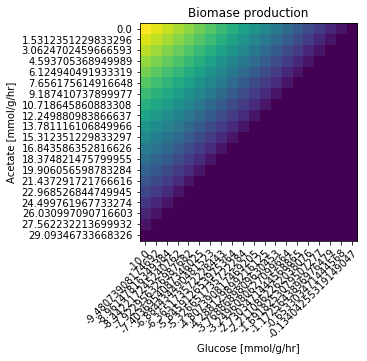

In [17]:
import cobra
model = cobra.io.read_sbml_model("iWFL_1372.xml")

import numpy as np
#Calcula prod_env
%matplotlib inline
import matplotlib.pyplot as plt
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model,["EX_glc__D_e","EX_ac_e"]) 
# Extrae los valores de cada flux sin repetirlos
xlabels=np.unique(prod_env["EX_glc__D_e"])
ylabels=np.unique(prod_env["EX_ac_e"])
# Crea una matrix en donde guardar los valores de u
mat=np.zeros((20,20))
for i in range(20):
    mat[i,0:20]=prod_env["flux_maximum"][i*20:(i+1)*20]
#Crea un heatmap de la matriz
fig,ax=plt.subplots()
ax.set_xticks(np.arange(len(xlabels)))
ax.set_yticks(np.arange(len(ylabels)))
# ... and label them with the respective list entries
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)    
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title("Biomase production")
ax.set_ylabel("Acetate [mmol/g/hr]")
ax.set_xlabel("Glucose [mmol/g/hr]")
mat[np.isnan(mat)]=0
ax.imshow(mat)

prod_env.head()


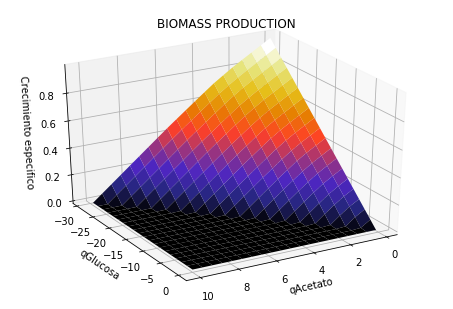

In [16]:
import cobra
model = cobra.io.read_sbml_model("iWFL_1372.xml")

#Phenotype phase plane

import cobra.test
import cobra
import numpy as np
import matplotlib.pyplot as plt
import re

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from cobra.flux_analysis import production_envelope
from numpy import zeros
%matplotlib inline
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model,["EX_glc__D_e","EX_ac_e"])
prod_env.head(21)
X      = np.unique(-1*prod_env["EX_glc__D_e"])   
Y      = np.unique(-1*prod_env["EX_ac_e"])        
data_Z = prod_env["flux_maximum"]
num_dat= len(X)                                   
matriz = np.zeros((num_dat,num_dat))
for i in range(num_dat):
    matriz[i,:] = data_Z[num_dat*i:num_dat*(i+1)]
matriz[np.isnan(matriz)] = 0.0                   
# Generando grafico 3D
fig  = plt.figure()
ax   = Axes3D(fig)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, matriz, rstride=1, cstride=1, linewidth=1, antialiased=True, cmap=plt.cm.CMRmap)
# Formato adicional del grafico
ax.view_init(elev =None, azim =60)
ax.set_xlabel("qAcetato")
ax.set_ylabel("qGlucosa")
ax.set_zlabel("Crecimiento especifico")
plt.title("BIOMASS PRODUCTION")
plt.show()


In [19]:
import numpy as np
v_predicted=np.array([solution.fluxes["EX_etoh_e"],solution.fluxes["EX_lac__L_e"],solution.fluxes["EX_for_e"],solution.fluxes["EX_ac_e"],solution.fluxes["EX_glc__D_e"]])
v_expected=np.array([2.63,0.71,7.20,-7.7,-10.64])
d=v_expected-v_predicted
euclidian_norm=np.dot(d,d)
print euclidian_norm


2.3176060000000005
